In [71]:
!pip install ISLP

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Lasso, Ridge, LinearRegression, LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from ISLP import load_data

In [73]:
df = load_data('Hitters')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   AtBat      322 non-null    int64   
 1   Hits       322 non-null    int64   
 2   HmRun      322 non-null    int64   
 3   Runs       322 non-null    int64   
 4   RBI        322 non-null    int64   
 5   Walks      322 non-null    int64   
 6   Years      322 non-null    int64   
 7   CAtBat     322 non-null    int64   
 8   CHits      322 non-null    int64   
 9   CHmRun     322 non-null    int64   
 10  CRuns      322 non-null    int64   
 11  CRBI       322 non-null    int64   
 12  CWalks     322 non-null    int64   
 13  League     322 non-null    category
 14  Division   322 non-null    category
 15  PutOuts    322 non-null    int64   
 16  Assists    322 non-null    int64   
 17  Errors     322 non-null    int64   
 18  Salary     263 non-null    float64 
 19  NewLeague  322 non-null    ca

In [74]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   AtBat      263 non-null    int64   
 1   Hits       263 non-null    int64   
 2   HmRun      263 non-null    int64   
 3   Runs       263 non-null    int64   
 4   RBI        263 non-null    int64   
 5   Walks      263 non-null    int64   
 6   Years      263 non-null    int64   
 7   CAtBat     263 non-null    int64   
 8   CHits      263 non-null    int64   
 9   CHmRun     263 non-null    int64   
 10  CRuns      263 non-null    int64   
 11  CRBI       263 non-null    int64   
 12  CWalks     263 non-null    int64   
 13  League     263 non-null    category
 14  Division   263 non-null    category
 15  PutOuts    263 non-null    int64   
 16  Assists    263 non-null    int64   
 17  Errors     263 non-null    int64   
 18  Salary     263 non-null    float64 
 19  NewLeague  263 non-null    categor

In [75]:
category = list(df.loc[:, df.nunique() <= 5])
dummies = pd.get_dummies(data = df[category], drop_first = True).astype(int)
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   League_N     263 non-null    int64
 1   Division_W   263 non-null    int64
 2   NewLeague_N  263 non-null    int64
dtypes: int64(3)
memory usage: 8.2 KB


In [76]:
X = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1)
X = pd.concat([X, dummies], axis = 1)
X.info()
y = df['Salary']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   AtBat        263 non-null    int64
 1   Hits         263 non-null    int64
 2   HmRun        263 non-null    int64
 3   Runs         263 non-null    int64
 4   RBI          263 non-null    int64
 5   Walks        263 non-null    int64
 6   Years        263 non-null    int64
 7   CAtBat       263 non-null    int64
 8   CHits        263 non-null    int64
 9   CHmRun       263 non-null    int64
 10  CRuns        263 non-null    int64
 11  CRBI         263 non-null    int64
 12  CWalks       263 non-null    int64
 13  PutOuts      263 non-null    int64
 14  Assists      263 non-null    int64
 15  Errors       263 non-null    int64
 16  League_N     263 non-null    int64
 17  Division_W   263 non-null    int64
 18  NewLeague_N  263 non-null    int64
dtypes: int64(19)
memory usage: 41.1 KB


In [77]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [78]:
print('Shape of data returned by pca is ',X_pca.shape)

Shape of data returned by pca is  (263, 19)


In [79]:
df_pca = pd.DataFrame(X_pca, columns = [f"PC{i + 1}" for i in range(X_pca.shape[1])])
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,-0.009649,-1.870522,1.265145,-0.935481,1.109636,1.211972,-0.065146,0.098249,-0.252423,-0.637101,-0.459341,-0.615860,0.478088,0.388407,0.063596,0.144790,-0.080216,0.038140,-0.019250
1,0.411434,2.429422,-0.909193,-0.264212,1.232031,1.826617,0.359893,1.199383,-0.371820,0.015215,-0.176235,-0.080529,-0.403483,-0.019386,0.065149,0.161064,-0.044343,0.014834,-0.003395
2,3.466822,-0.825947,0.555469,-1.616726,-0.857488,-1.028712,-0.999385,-0.844247,0.197379,0.770490,-0.055645,-0.104938,-0.021605,-0.376197,0.234291,0.011526,0.218283,0.037825,-0.066501
3,-2.558317,0.230984,0.519642,-2.176251,-0.820301,1.491696,-0.276141,-0.207094,0.414956,0.136842,0.085375,0.146217,-0.142172,0.028975,0.042459,0.053043,0.044443,0.010360,-0.013582
4,1.027702,1.573537,1.331382,3.494004,0.983427,0.513675,0.140456,-0.989707,-0.661933,-0.217565,-0.111259,-0.191244,0.302426,-0.090770,0.043811,0.012300,0.050593,0.126036,-0.071035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,-0.331167,0.165663,0.775890,-1.536702,-1.035016,-0.306299,0.552371,-1.184243,-0.246646,0.379402,0.094963,0.033645,-0.216773,-0.161802,0.227441,-0.224885,-0.126489,-0.055403,-0.009739
259,3.246183,0.543315,1.209150,2.754023,-1.197520,0.834749,1.969884,1.371907,-0.543945,-0.897725,0.166160,0.298189,-0.510572,0.318121,-0.144807,0.008947,0.152826,-0.053871,-0.062282
260,-1.094609,0.751386,-0.935937,1.072347,0.705912,-0.644482,1.496147,-0.287111,-0.304373,0.017862,-0.221392,-0.378174,-0.016308,0.092282,0.056039,-0.103487,0.078738,0.067201,0.013194
261,1.977682,2.184517,-0.282012,-0.216874,-0.694872,3.514692,1.142097,0.230697,-0.240990,0.324960,-0.118597,-0.162044,0.347028,-0.232762,0.021050,-0.262275,0.014407,0.022921,-0.010530


We made p linear combinations of P predictors. Nothing usefull since p == P, so right now we will see how much varince its explained by each PCA component.

In [80]:
num_pca = []
cum_sum_variance = []
total_variance = 0
for i, var in enumerate(pca.explained_variance_ratio_):
    total_variance += var * 100
    cum_sum_variance.append(total_variance)
    num_pca.append(i + 1)

variance_explained = pd.DataFrame(cum_sum_variance)
variance_explained['num_pca'] = num_pca
variance_explained = variance_explained.set_index('num_pca')
variance_explained

,0
num_pca,
1,38.314240
2,60.155315
3,70.841675
4,79.034194
5,84.290275
6,88.634779
7,92.262888
8,94.963043
9,96.282691


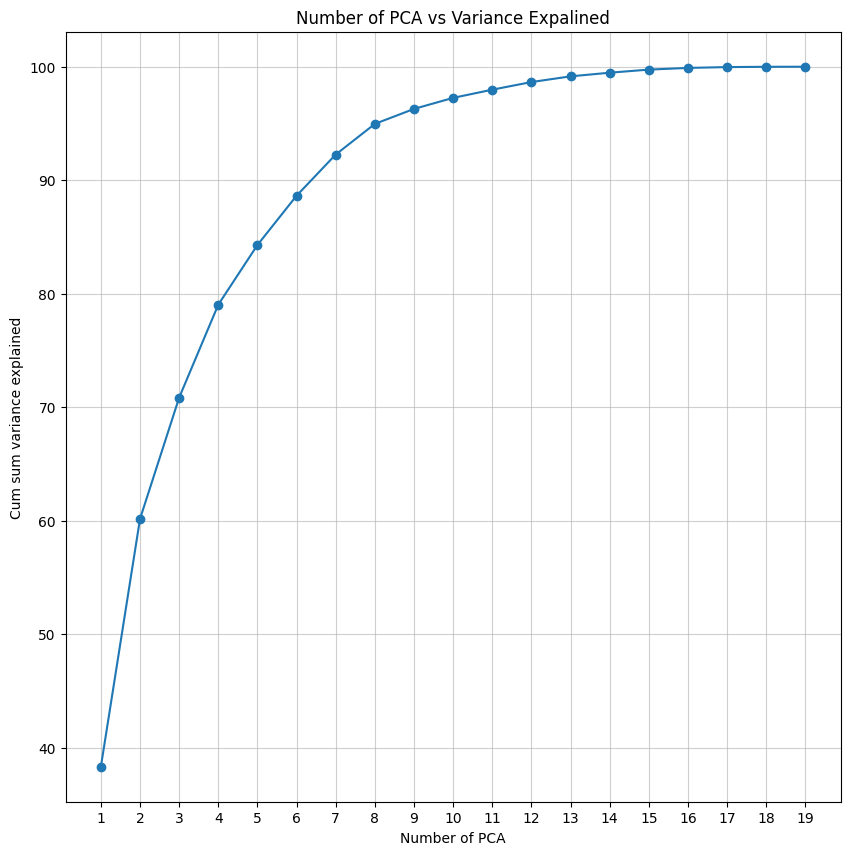

In [81]:
fig, ax = plt.subplots(figsize = (10,10))
variance_explained.plot(ax = ax, marker = 'o', legend = False)
ax.set_title('Number of PCA vs Variance Expalined')
ax.set_xlabel('Number of PCA')
ax.set_ylabel('Cum sum variance explained')
ax.set_xticks(ticks = range(1, 20))
ax.grid(alpha = 0.6)
fig.show()

Now vy looking at the graph we can search for the point that maximizes the variance explained while minimizing the number of components. Usually we select the point which forms the biggest elbow, in this example it is not clear so we select some between [6, 9].

# Appliying Regression into our new components

In [82]:
scores = []
n_components = list(range(1, len(df_pca.columns) + 1))
for n in range(1, len(df_pca.columns) + 1):
    lr = LinearRegression()
    X = df_pca.iloc[:, :n]
    score = -np.mean(cross_val_score(lr, X, y, cv=10, scoring='neg_mean_squared_error'))
    scores.append(score)

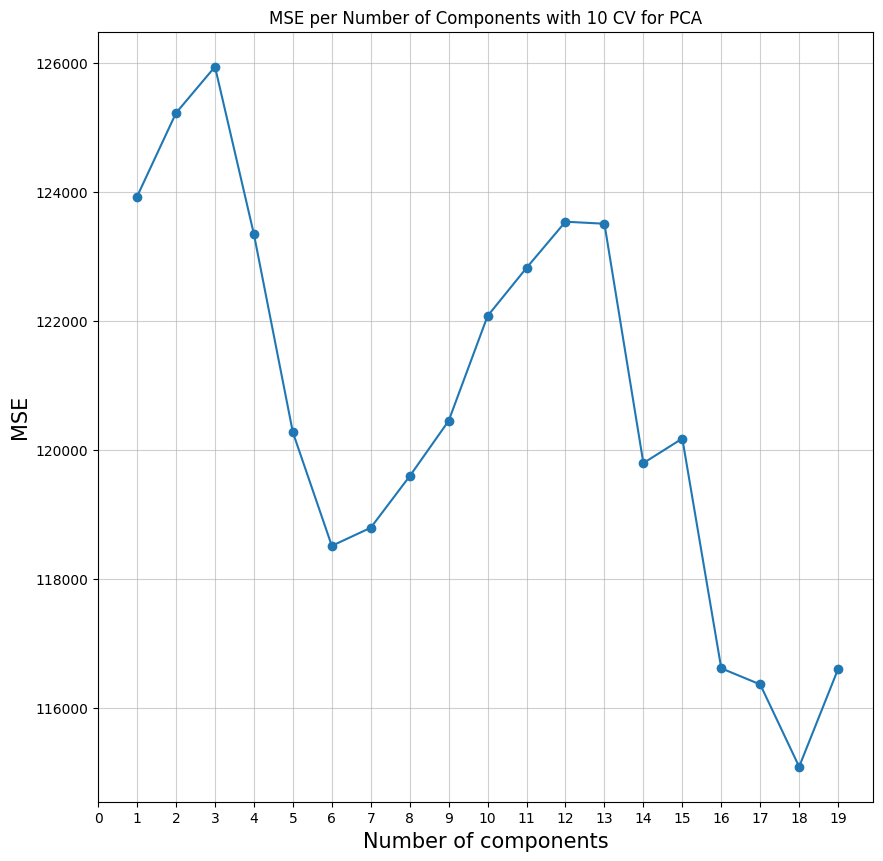

In [83]:
plt.figure(figsize = (10,10))
plt.plot(n_components, scores, marker = 'o')
plt.title('MSE per Number of Components with 10 CV for PCA')
plt.xlabel('Number of components', fontsize = 15)
plt.xticks(ticks = range(0, 20))
plt.ylabel('MSE', fontsize = 15)
plt.grid(alpha = 0.6)
plt.show()

By looking at the graph the model tell us to pick the first 6 components, representing approximatly 91% of the variance.

Choosing a higher model will mostlikely useless since the approach of PCA is to reduce the space complexity in order to fight the curse of dimensionality. (Original P == 19, M == 6, a real reduction has been made).

# Partial least Squares

In [89]:
X = df.drop(['Division', 'NewLeague', 'League', 'Salary'], axis = 1)
X = pd.concat([X, dummies], axis = 1)
X_scaled = scaler.fit_transform(X)
n_components = X.shape[1]
scores = []
for n in range(1, n_components + 1):
    pls = PLSRegression(n_components=n)
    score = -np.mean(cross_val_score(pls, X_scaled, y, cv=10, scoring='neg_mean_squared_error'))
    scores.append(score)


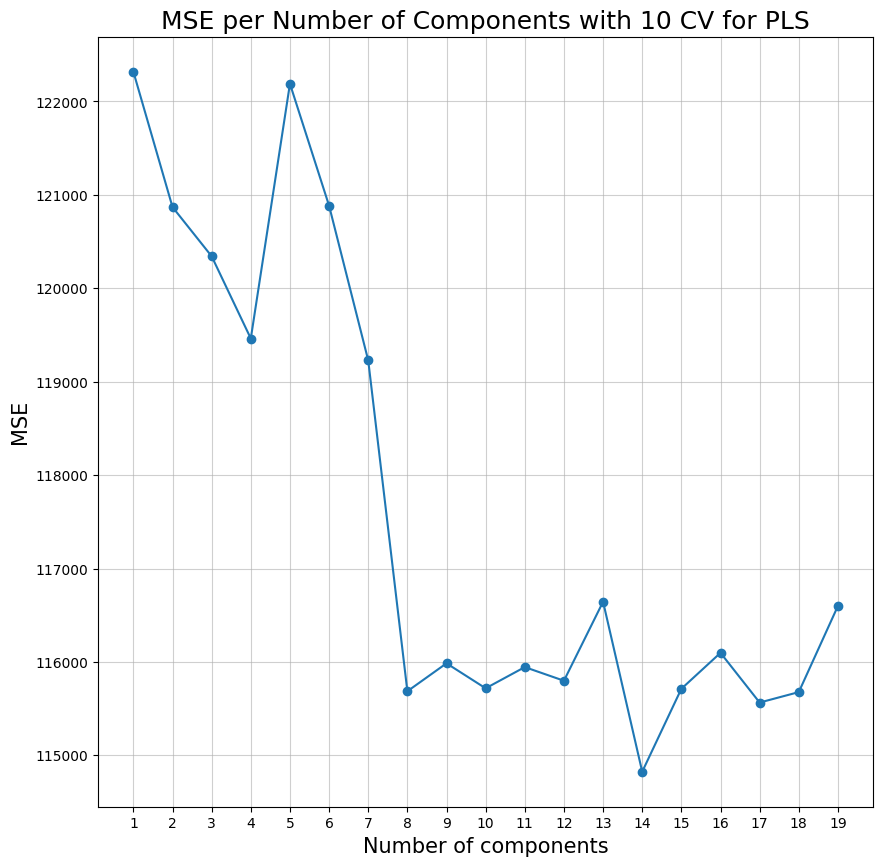

In [90]:
plt.figure(figsize=(10, 10))
plt.plot(range(1, n_components + 1), scores, marker='o')
plt.title('MSE per Number of Components with 10 CV for PLS', fontsize=18)
plt.xlabel('Number of components', fontsize=15)
plt.ylabel('MSE', fontsize=15)
plt.xticks(range(1, n_components + 1))
plt.grid(alpha=0.6)
plt.show()


PLS estimates that the lowest MSE can be achived by using 14 components, but the best model is the one using 8 which has almost the same result but lower complexity.